In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import tensorflow as tf
from tensorflow import keras

In [2]:
(X_train, y_train), (X_test,y_test)= keras.datasets.mnist.load_data()
X_train[0]

11501568/11490434 [==============================] - 0s 0us/step


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [3]:
X_train.shape

(60000, 28, 28)

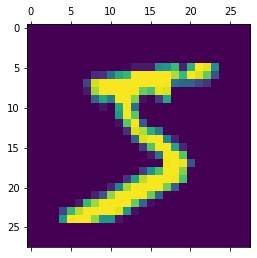

In [4]:
plt.matshow(X_train[0])

In [5]:
y_train[0]

5

In [6]:
X_train_one = X_train.reshape(len(X_train), 28*28)
X_test_one = X_test.reshape(len(X_test), 28*28)
X_train_one = X_train_one/255
X_test_one = X_test_one/255
X_train_one[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [7]:
ann = tf.keras.Sequential()
ann.add(tf.keras.layers.Dense(392, input_shape=(784,), activation='relu'))
ann.add(tf.keras.layers.Dense(10, activation='sigmoid'))
ann.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
ann.fit(X_train_one, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2095 - accuracy: 0.9377
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0853 - accuracy: 0.9740
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0555 - accuracy: 0.9831
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0395 - accuracy: 0.9872
Epoch 5/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0293 - accuracy: 0.9907
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0231 - accuracy: 0.9923
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0189 - accuracy: 0.9938
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0134 - accuracy: 0.9957
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0136 - accuracy: 0.9955
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.00

In [8]:
ann.evaluate(X_test_one, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0786 - accuracy: 0.9818


[0.07861509174108505, 0.9818000197410583]

Text(96.0, 0.5, 'Given Value')

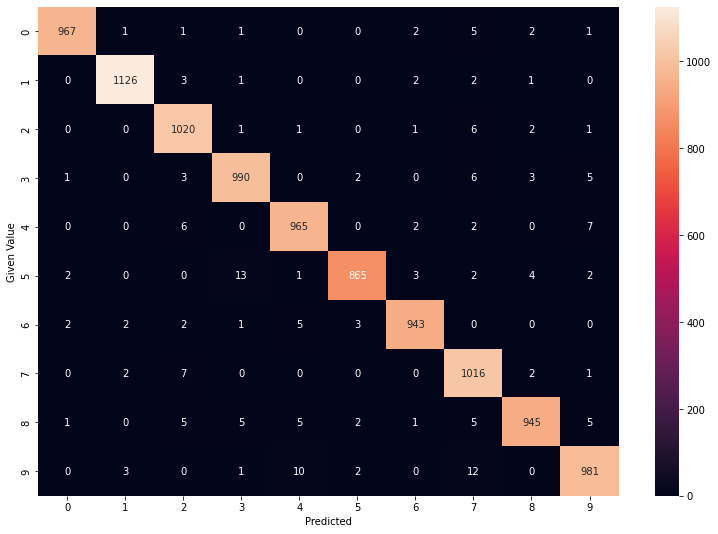

In [9]:
predict = ann.predict(X_test_one)
pred_val = [np.argmax(i) for i in predict]
conf_mat = tf.math.confusion_matrix(predictions=pred_val,labels=y_test)
plt.figure(figsize=(13,9))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Given Value')